In [17]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [18]:
plt.style.use("ggplot")

In [19]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)

In [20]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
df.shape

(569, 30)

In [22]:
X = df.values

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [24]:
cov_m = np.cov(X_scaled.T)
cov_m.shape

(30, 30)

In [25]:
eigenvalues,eigenvectors = np.linalg.eig(cov_m)

In [26]:
eigenvalues

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [27]:
eigenvalues.shape

(30,)

In [28]:
eigenvectors = eigenvectors.T

In [29]:
eigenvectors[0,:]

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [30]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /=eigenvalues.max()
eigenvalues

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99453783,
       0.99456279, 0.99461577, 0.99484578, 0.99511837, 0.99563442,
       0.99623625, 0.99704761, 0.99796226, 0.9990009 , 1.        ])

In [31]:
p = eigenvectors[0:10,:]
p.shape

(10, 30)

In [32]:
data_new = np.dot(p,X_scaled.T)
data_new.shape

(10, 569)

In [33]:
data_new = data_new.T
data_new.shape

(569, 10)

In [34]:
df_new = pd.DataFrame(data_new,columns=["PC1","PC2","PC3",
                                       "PC4","PC5","PC6","PC7",
                                       "PC8","PC9","PC10"])

df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,1.195110,1.411424,-2.159370,0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775,0.028656,-0.013358,-0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,0.177086,0.541452,0.668166,-0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,2.960878,3.053422,-1.429911,-1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,-0.546747,-1.226495,0.936213,-0.636376,-0.263805,0.377704


In [35]:
print("Transformed data:",df_new.shape)
print("Orginal data: ",df.shape)

Transformed data: (569, 10)
Orginal data:  (569, 30)


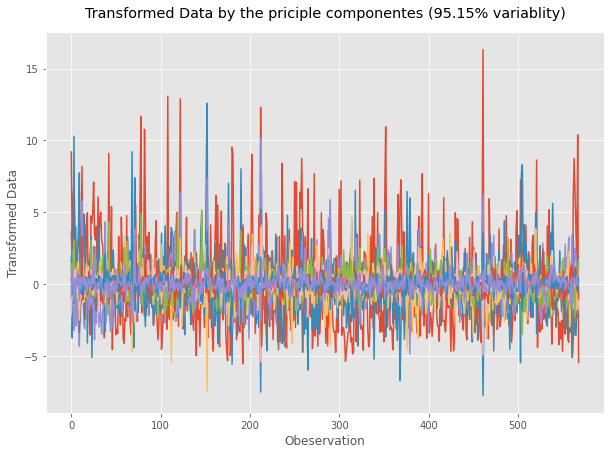

In [36]:
plt.figure(figsize=(10,7))

plt.plot(data_new)
plt.xlabel("Obeservation")
plt.ylabel("Transformed Data")
plt.title("Transformed Data by the priciple componentes (95.15% variablity)",pad=15)
plt.savefig("plot_manula.png")

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)
pca_values = pca.fit_transform(X_scaled)

In [39]:
pca_values

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.6720101 ],
       [-5.4752433 , -0.67063679]])

In [40]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [42]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(X_scaled)

In [43]:
pca_values

array([[ 9.19283683,  1.94858307, -1.12316669,  3.63373182, -1.19510764,
         1.4114115 ],
       [ 2.3878018 , -3.76817174, -0.52929245,  1.11826345,  0.62177387,
         0.02866205],
       [ 5.73389628, -1.0751738 , -0.55174748,  0.91208238, -0.1770862 ,
         0.54145518],
       ...,
       [ 1.25617928, -1.90229671,  0.56273058, -2.08922714,  1.8099911 ,
        -0.53444578],
       [10.37479406,  1.6720101 , -1.87702946, -2.35603092, -0.0337413 ,
         0.56793367],
       [-5.4752433 , -0.67063679,  1.49044278, -2.29915645, -0.18470241,
         1.61782923]])

In [44]:
var = pca.explained_variance_ratio_
var

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522])

In [45]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([44.27, 63.24, 72.63, 79.23, 84.73, 88.75])

Text(0.5, 0, 'No. of PC')

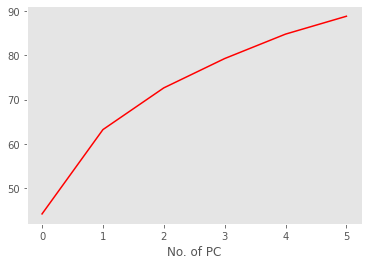

In [46]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")
plt.grid()
plt.xlabel("No. of PC")

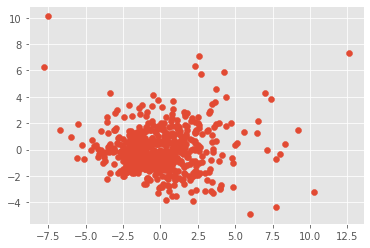

In [47]:
# plot between PCA1 and PCA2 
x = pca_values[:,1]
y = pca_values[:,2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [53]:
df = pd.DataFrame({"pc1":pca_values[:,0],"pc2":pca_values[:,1]})

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

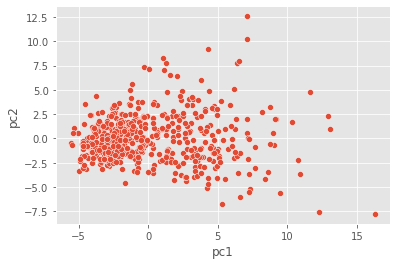

In [54]:
import seaborn as sns
sns.scatterplot(data=df,x='pc1',y='pc2')